# Analyse Exploratoire du fichier myreport_sql_gestionairedememoire_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pda.read_csv('../data/logServer/myreport_sql_gestionairedememoire_full.csv',sep=',')

### Le fichier myreport_sql_gestionairedememoire_full.csv : taille, colonnes

In [3]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  16  colonnes dans le data frame


In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Mémoire de connexion',
       'Mémoire de connexion(RAW)', 'Mémoire de l'optimiseur',
       'Mémoire de l'optimiseur(RAW)', 'Mémoire totale du serveur',
       'Mémoire totale du serveur(RAW)', 'Mémoire du serveur cible',
       'Mémoire du serveur cible(RAW)', 'Mémoire du cache SQL',
       'Mémoire du cache SQL(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date et heure                   2882 non-null   object 
 1   Date et heure(RAW)              2881 non-null   float64
 2   Mémoire de connexion            2195 non-null   object 
 3   Mémoire de connexion(RAW)       2194 non-null   float64
 4   Mémoire de l'optimiseur         2195 non-null   object 
 5   Mémoire de l'optimiseur(RAW)    2194 non-null   float64
 6   Mémoire totale du serveur       2195 non-null   object 
 7   Mémoire totale du serveur(RAW)  2194 non-null   float64
 8   Mémoire du serveur cible        2195 non-null   object 
 9   Mémoire du serveur cible(RAW)   2194 non-null   float64
 10  Mémoire du cache SQL            2195 non-null   object 
 11  Mémoire du cache SQL(RAW)       2194 non-null   float64
 12  Temps mort                      21

On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                     2882
Date et heure(RAW)                2881
Mémoire de connexion               352
Mémoire de connexion(RAW)          506
Mémoire de l'optimiseur            361
Mémoire de l'optimiseur(RAW)       396
Mémoire totale du serveur         1403
Mémoire totale du serveur(RAW)    1563
Mémoire du serveur cible             1
Mémoire du serveur cible(RAW)        1
Mémoire du cache SQL              1688
Mémoire du cache SQL(RAW)         1691
Temps mort                           1
Temps mort(RAW)                      1
Couverture                           3
Couverture(RAW)                      2
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [7]:
tab.head()


,Date et heure,Date et heure(RAW),Mémoire de connexion,Mémoire de connexion(RAW),Mémoire de l'optimiseur,Mémoire de l'optimiseur(RAW),Mémoire totale du serveur,Mémoire totale du serveur(RAW),Mémoire du serveur cible,Mémoire du serveur cible(RAW),Mémoire du cache SQL,Mémoire du cache SQL(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 248 Ko,1248.0000,1 640 Ko,1640.0,55 295 867 Ko,5.529587e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,1 213 Ko,1213.3333,1 640 Ko,1640.0,55 295 819 Ko,5.529582e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,1 203 Ko,1202.6667,1 640 Ko,1640.0,55 293 627 Ko,5.529363e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0


## Analyse temporelle

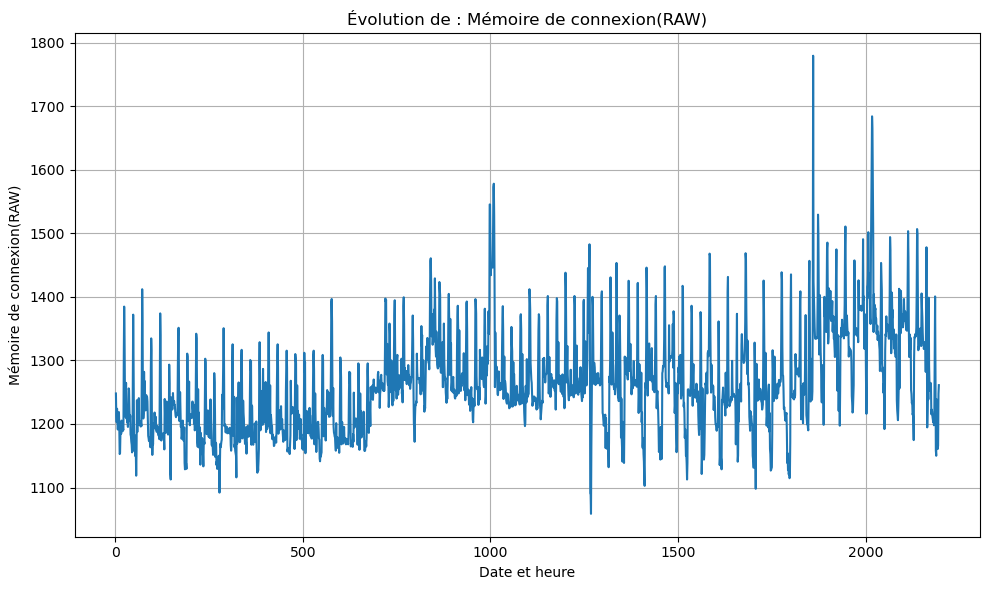

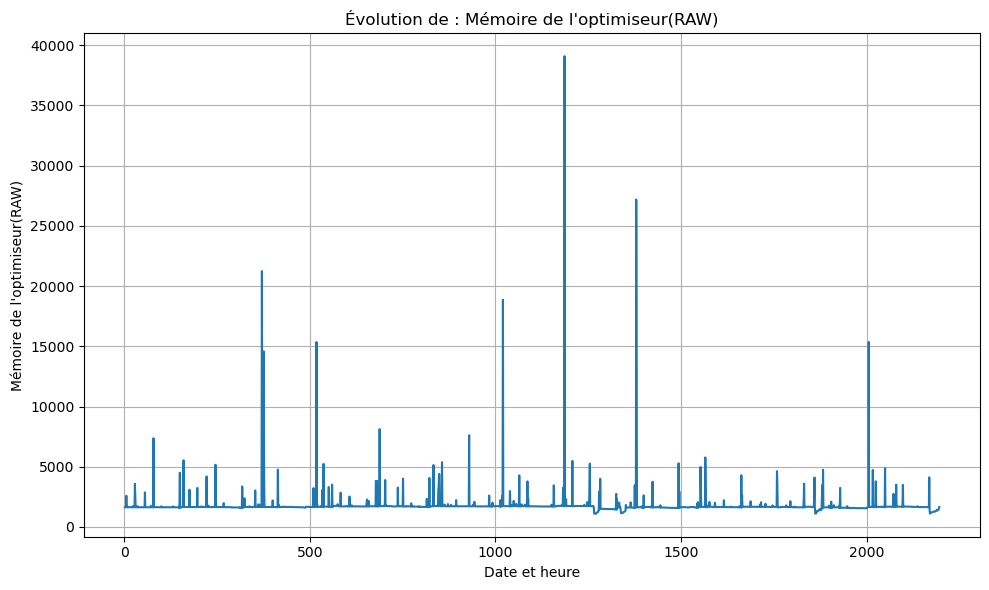

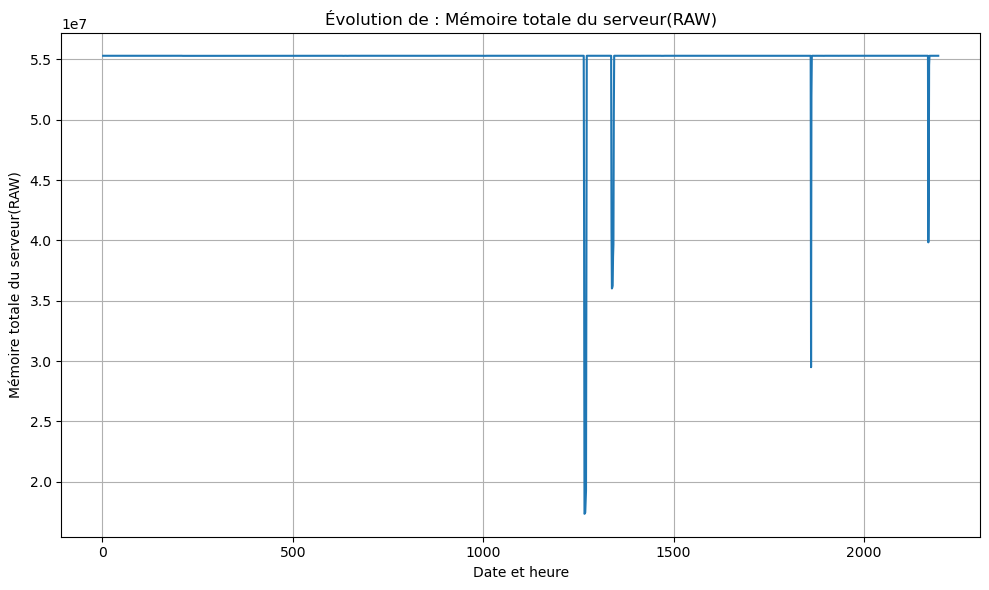

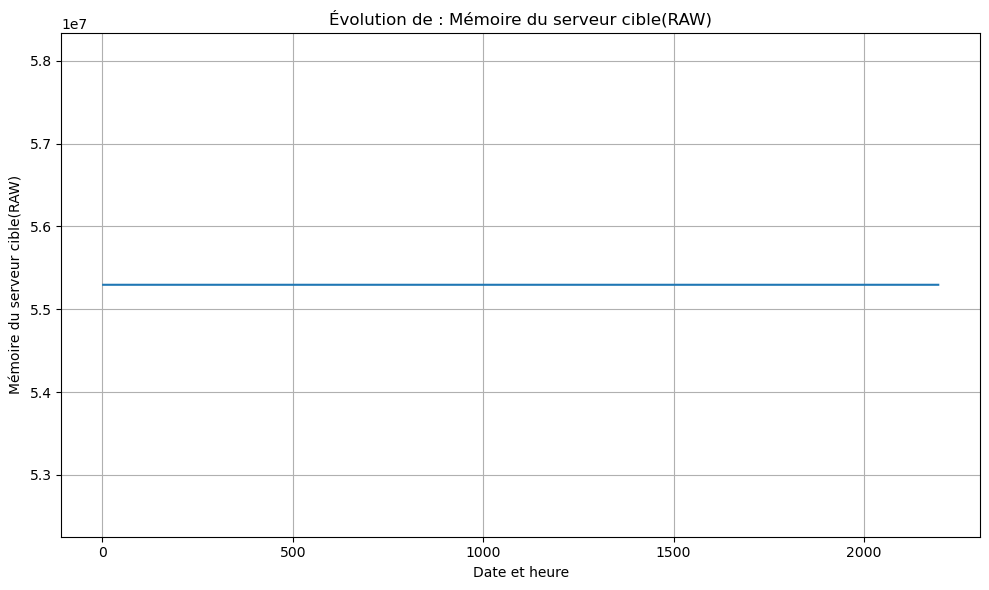

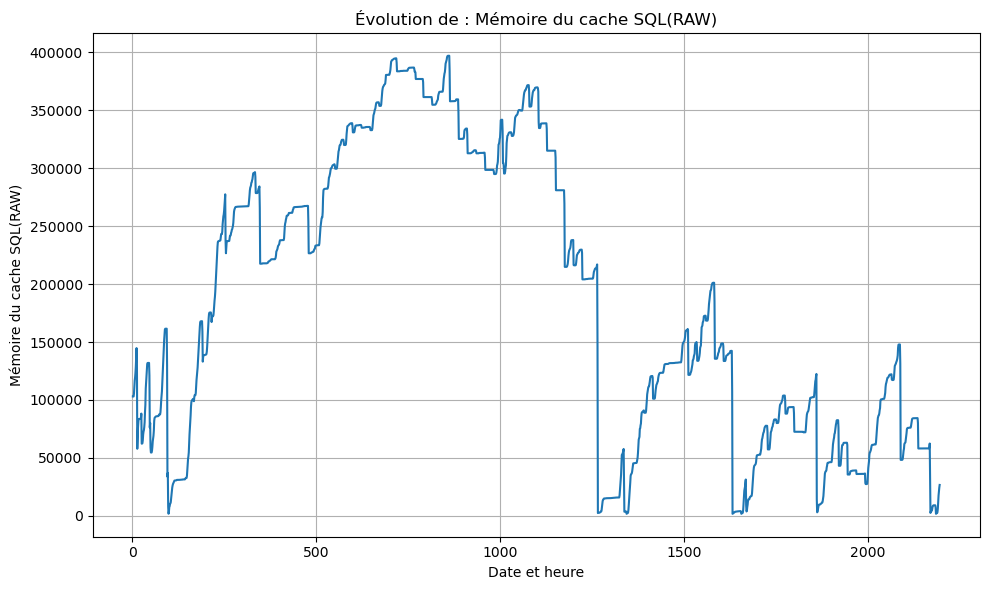

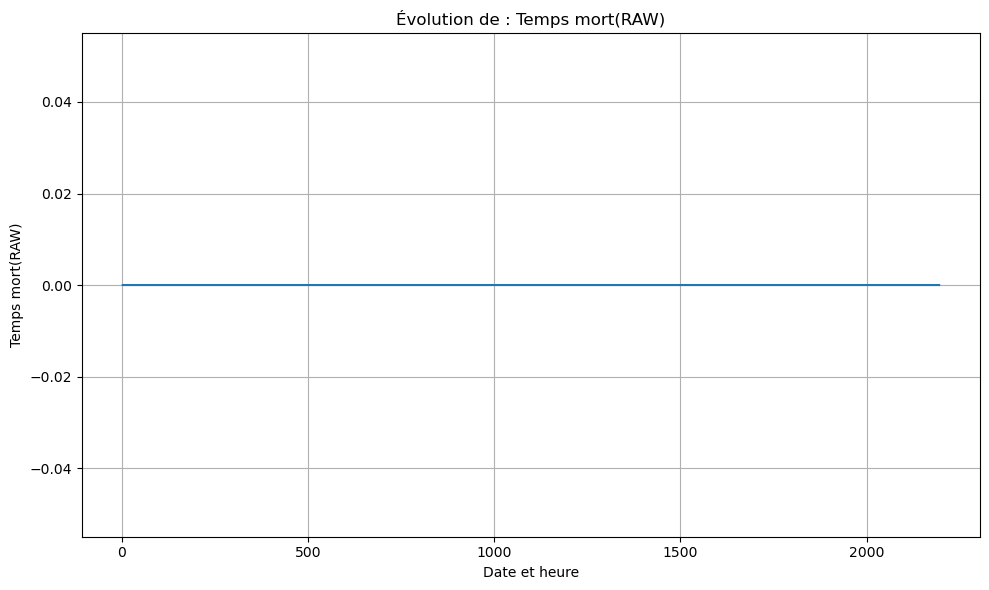

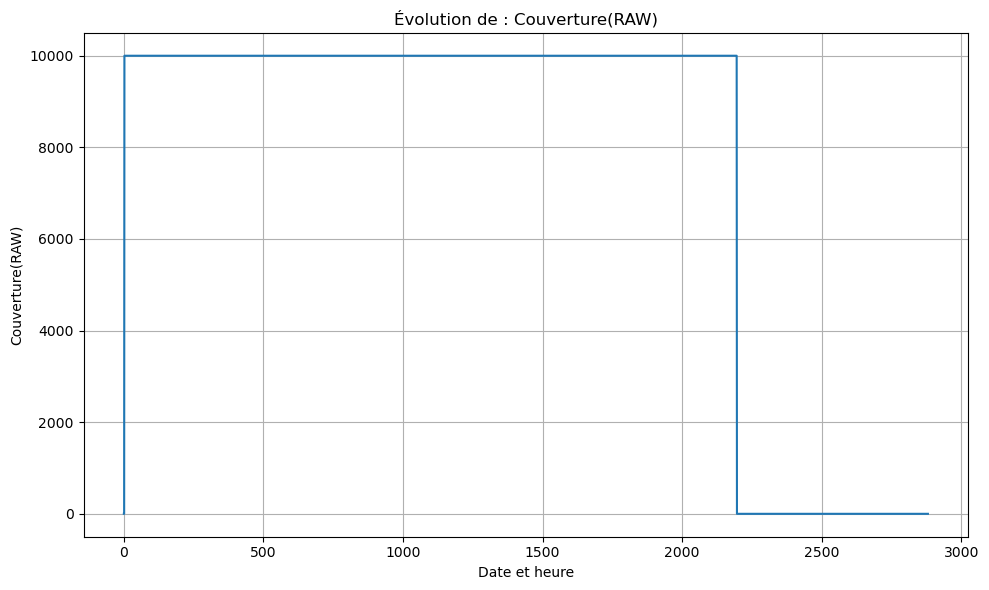

In [8]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()